# Analisis Bisnis Y.Afisha

Memanfaatkan pengetahuan dan keterampilan yang diperoleh dari kursus Practicum, saya siap untuk menerima tantangan pertama dalam program magang di departemen analitik perusahaan Y.Afisha. Tugas saya adalah membantu mengoptimalkan anggaran biaya pemasaran, dan saya berkomitmen untuk memberikan kontribusi maksimal dalam mencapai tujuan perusahaan.

## Diskripsi Proyek

Proyek analisis bisnis ini berkaitan dengan data kunjungan situs dan pesanan Y.Afisha dari Januari 2017 hingga Desember 2018, serta statistik biaya pemasaran.

## Daftar Isi

* [Tujuan](#)
* [Tahapan](#)
* [1. Pra-pemrosesan Data](#)
    * [1.1. Memuat Data](#)
    * [1.2. Mengeksplorasi Data Awal](#)
    * [Kesimpulan dan Langkah-Langkah Selanjutnya](#)
    * [1.3. Megoptimalkan Data](#)
    * [1.4. Memperbaiki Penulisan Judul](#)
    * [1.5. Memperbaiki Anomali Data](#)
* [2. Analisis Data Exploratif (EDA)](#)
    * [2.1. Memeriksa Data yang Sudah Bersih](#)
    * [2.2. Menyusun Laporan dan Menghitung Metrik](#)
        * [2.2.1. Product Analysis](#)
        * [2.2.2. Sales Analysis](#)
        * [2.2.3. Marketing Analysis](#)
* [Kesimpulan Umum](#)
    * [A. Pra-pemrosesan](#)
    * [B. Analisis Data Eksploratif (EDA)](#)
    
### Tujuan

1. Melakukan analisis perilaku pengguna dalam penggunaan produk Y.Afisha.
2. Mengidentifikasi titik awal pembelian oleh pengguna Y.Afisha.
3. Menghitung total sumbangan uang dari setiap pengguna Y.Afisha.
4. Mengidentifikasi waktu terbayarnya semua biaya pemasaran.

### Tahapan

Data proyek analisis bisnis ini disimpan dalam file:

* `/datasets/costs_us.csv`
* `/datasets/orders_log_us.csv`
* `/datasets/visits_log_us.csv`

Proyek ini terdiri dari dua tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)

## 1. Pra-pemrosesan Data

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
import matplotlib.ticker as ticker

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data_visits = pd.read_csv('visits_log_us.csv')
    data_orders = pd.read_csv('orders_log_us.csv')
    data_costs = pd.read_csv('costs_us.csv')
except:
    data_visits = pd.read_csv('/datasets/visits_log_us.csv')
    data_orders = pd.read_csv('/datasets/orders_log_us.csv')
    data_costs = pd.read_csv('/datasets/costs_us.csv')

### 1.2. Mengeksplorasi Data Awal

**Data Visits** (log/catatan server yang memuat data kunjungan ke situs web)

In [3]:
data_visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


**Deskripsi data_visits:**

* `Uid` — ID pengguna
* `Device` — perangkat pengguna
* `Start Ts` — tanggal dan waktu dimulainya sesi
* `End Ts` — tanggal dan waktu berakhirnya sesi
* `Source Id` — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

Semua tanggal dalam tabel ini menggunakan format YYYY-MM-DD

In [4]:
# Check data info
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
data_visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [6]:
# Check total missing values descending
data_visits.isna().sum().sort_values(ascending=False)

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
# Check duplicated data
data_visits.duplicated().sum()

0

In [8]:
# Check anomaly timestamp
time_check = data_visits.query("`End Ts` < `Start Ts`")
time_check

,Device,End Ts,Source Id,Start Ts,Uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


**Kesimpulan sementara:**

* Tabel `data_visits` memiliki entri nama yang memerlukan pembenahan, dengan adanya campuran huruf besar dan spasi yang tidak konsisten.
* Tabel `data_visits` menunjukkan penggunaan memori yang tinggi, kemungkinan karena penyimpanan yang tidak optimal pada kolom date/time.
* Kolom `Device` memiliki jumlah kategori yang terbatas.
* Tidak ada nilai yang hilang pada data tersebut.
* Tabel `data_visits` tidak mengandung duplikat nilai.
* Ditemukan anomali data di mana nilai Start Ts melebihi nilai End Ts.

**Data Orders** (data terkait pesanan)

In [9]:
data_orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


**Deskripsi data_orders:**

* `Uid` — ID pengguna yang membuat pesanan
* `Buy Ts` — tanggal dan waktu pesanan dibuat
* `Revenue` — pendapatan Y.Afisha dari pesanan tersebut

In [10]:
# Check data info
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
# Check statistics data
data_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
# Check duplicated data
data_orders.duplicated().sum()

0

In [13]:
# Check duplicated data
data_orders.duplicated().sum()

0

**Kesimpulan sementara:**

* Tabel `data_orders` memiliki entri nama yang memerlukan penataan, dengan adanya campuran huruf besar yang tidak konsisten pada kata-kata.
* Tabel `data_orders` mengandung nilai anomali pada kolom Revenue, yang perlu dianalisis untuk memahami dampaknya terhadap keseluruhan data.
* Tidak ada nilai yang hilang pada data tersebut.
* Tabel `data_orders` tidak mengandung duplikat nilai.

**Data Costs** (data terkait pengeluaran pemasaran):

In [14]:
data_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


**Deskripsi data_costs:**

* `source_id` — ID sumber iklan
* `dt` — tanggal
* `costs` — pengeluaran untuk sumber iklan pada tanggal tersebut

In [15]:
# Check data info
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
# Check statistics data
data_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [17]:
# Check total missing values descending
data_costs.isna().sum().sort_values(ascending=False)

source_id    0
dt           0
costs        0
dtype: int64

In [18]:
# Check duplicated data
data_costs.duplicated().sum()

0

**Kesimpulan sementara:**

* Tabel `data_costs` telah memiliki penulisan kolom yang teratur.
* Kolom `costs` perlu diperiksa untuk mendeteksi adanya anomali data.
* Tidak terdapat nilai hilang.
* Tabel `data_costs` tidak mengandung duplikat nilai.

### Kesimpulan dan Langkah-Langkah Selanjutnya

**Nilai yang Hilang**

Untuk mengoptimalkan data guna analisis, pastikan setiap kolom disajikan dalam tipe data yang tepat.
Langkah pertama yaitu memeriksa nilai yang hilang dalam data:

* Dalam setiap tabel, tidak ditemukan nilai yang hilang. Proses pengisian nilai hilang dapat dilanjutkan ke tahap selanjutnya

**Gaya Penulisan**

Setelah mengatasi nilai-nilai yang hilang, langkah selanjutnya yaitu merapihkan data:

* Untuk mengoptimalkan penggunaan memori, akan dilakukan konversi format objek pada kolom tanggal di tiga tabel. Kolom `Start Ts`, `End Ts`, `Buy Ts`, dan `dt` akan diubah menjadi objek Datetime
* Untuk mengoptimalkan kolom `Device` yang memiliki kategori yang terbatas, akan dilakukan penyesuaian tipe data yang lebih sesuai.
* Pada tabel `data_visits` dan `data_orders`, perlu dilakukan penyesuaian format penulisan kolom menjadi huruf kecil dan mengganti spasi dengan underscore (_).

**Duplikat**

Setelah mengoptimalkan data serta merapihkannya, selanjutnya memeriksa duplikat pada data:

* Dalam analisis awal, tidak ditemukan adanya nilai duplikat di setiap tabel. Proses penghapusan nilai duplikat dapat dilanjutkan ke tahap selanjutnya.

**Anomali Data**

Setelah memeriksa data duplikat, perlu mempertimbangkan adanya data anomali yang dapat mempengaruhi analisis penelitian.
Berikut data anomali yang diperiksa:

* Pada kolom `Revenue` dalam tabel `data_orders`, perlu dilakukan pemeriksaan untuk mendeteksi adanya anomali data atau nilai outlier.
* Pada kolom `costs` dalam tabel `data_costs`, perlu dilakukan pemeriksaan untuk mendeteksi adanya anomali data atau nilai outlier.
* Terjadi anomali pada tabel 'data_visits' terkait kolom TS yang tidak tepat.

### 1.3. Mengoptimalkan Data

data dioptimalkan menggunakan dtype dan parse_dates

In [19]:
# Try and except datasets
try:
    data_visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
    data_orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
    data_costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    data_visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
    data_orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    data_costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [20]:
# Create a tuple from the dataframes.
data = (data_visits, data_orders, data_costs)

# Assign names to the dataframes
data_visits.name = 'visits_log_us'
data_orders.name = 'orders_log_us'
data_costs.name = 'costs_us'

### 1.4. Memperbaiki Penulisan Judul

In [21]:
# Loop for changing column name in every table
for df in data:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('\s+', '_', regex=True)

In [22]:
# Print a concise summary of the dataFrames with pandas.DataFrame.info() method.
for df in data:
    print("{}".format(df.name))
    df.info()
    print()

visits_log_us
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

orders_log_us
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

costs_us
<class 'pandas.core.frame.Data

### 1.5. Memperbaiki Anomali Data

In [23]:
data_visits = data_visits.query("`start_ts` <= `end_ts`").reset_index(drop=True)

In [24]:
data_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359393,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359394,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359395,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359396,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


## 2. Analisis Data Exploratif (EDA)

### 2.1. Memeriksa Data yang Sudah Bersih

In [25]:
for df in data:
    print("{}".format(df.name))
    print(df.head(10))
    print()

visits_log_us
    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   128924


### 2.2. Menyusun Laporan dan Menghitung Metrik

Dalam menganalisis data ini perlu menjawab beberapa pertanyaan berikut:

1. Produk
* Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
* Berapa jumlah sesi per harinya?
* Berapa lama durasi untuk setiap sesi?
* Seberapa sering pengguna kembali menggunakan produk?

2. Penjualan
* Kapan orang-orang mulai melakukan pembelian?
* Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
* Berapa besaran rata-rata pembeliannya?
* Berapa jumlah uang yang mereka kontribusikan?

3. Pemasaran
* Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu?
* Berapa biaya akuisisi pelanggan dari masing-masing sumber?
* Seberapa menguntungkannya investasi tersebut?

#### 2.2.1. Product Analysis

**a. Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?**

In [26]:
# Analysis data_visits
data_visits['visits_year']  = data_visits['start_ts'].dt.year
data_visits['visits_month'] = data_visits['start_ts'].dt.month
data_visits['visits_week']  = data_visits['start_ts'].dt.week
data_visits['visits_date'] = data_visits['start_ts'].dt.date
data_visits.head()

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [27]:
dau_total = data_visits.groupby('visits_date').agg({'uid': 'nunique'}).mean()
wau_total = data_visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean()
mau_total = data_visits.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean()

print('Average Daily Active (unique) Users :', int(dau_total))
print('Average Weekly Active (unique) Users :',int(wau_total))
print('Average Monthly Active (unique) Users :',int(mau_total)) 

Average Daily Active (unique) Users : 907
Average Weekly Active (unique) Users : 5716
Average Monthly Active (unique) Users : 23228


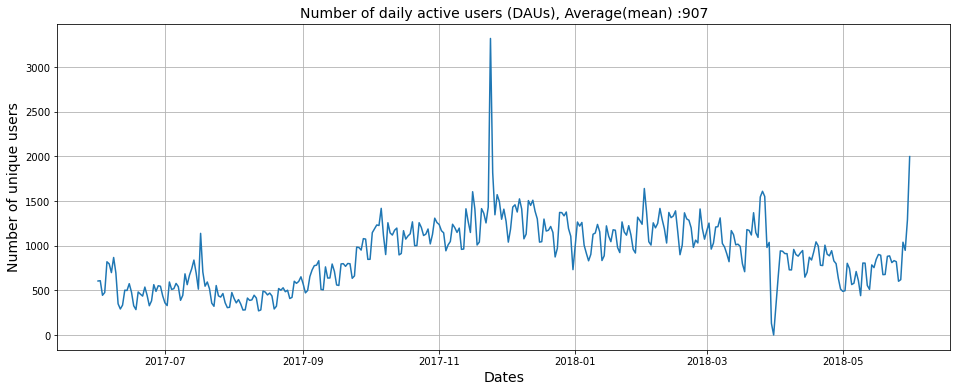

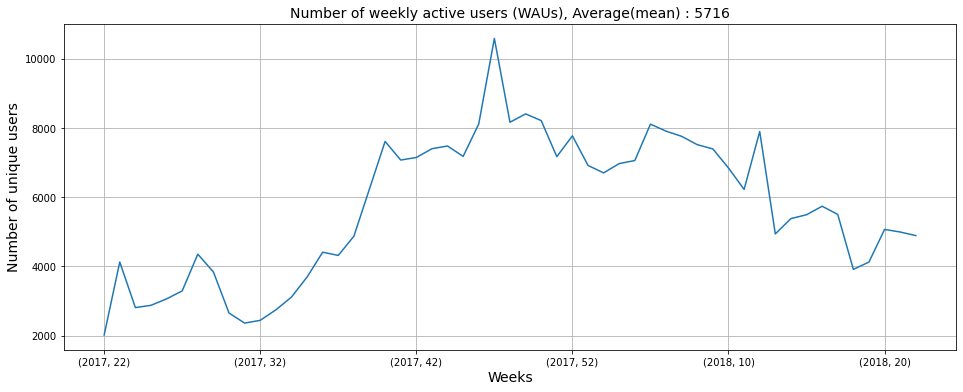

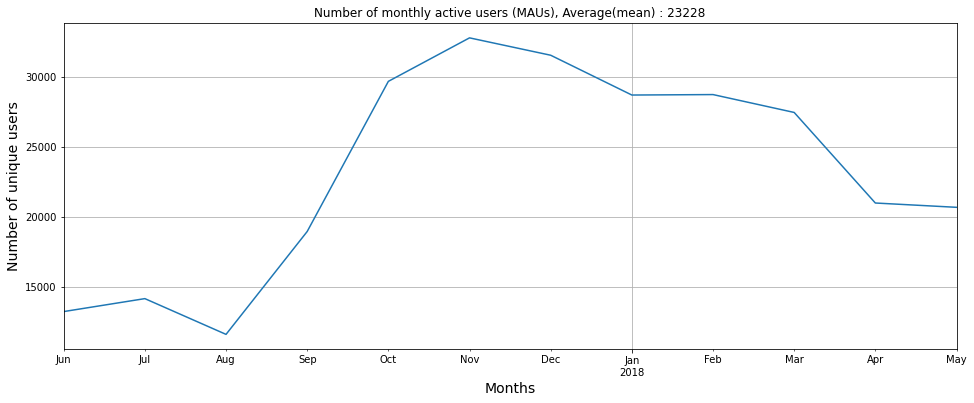

In [28]:
# Plot for daily, weekly and monthly
visits_plot = data_visits.copy()
fig, ax = plt.subplots(figsize=(16,6))
visits_plot.groupby(visits_plot['start_ts'].dt.date)['uid'].nunique().plot()
plt.xlabel("Dates", fontsize=14)
plt.ylabel("Number of unique users", fontsize=14)
plt.title(f"Number of daily active users (DAUs), Average(mean) :{int(round(visits_plot.groupby(visits_plot['start_ts'].dt.date)['uid'].nunique().mean(),2))}", fontsize=14)
plt.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(16,6))
visits_plot.groupby([visits_plot['start_ts'].dt.year,visits_plot['start_ts'].dt.isocalendar().week])['uid'].nunique().plot()
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("Number of unique users", fontsize=14)
plt.title(f"Number of weekly active users (WAUs), Average(mean) : {int(round(visits_plot.groupby([visits_plot['start_ts'].dt.year,visits_plot['start_ts'].dt.isocalendar().week])['uid'].nunique().mean(),2))}", fontsize=14)
plt.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(16,6))
visits_plot.groupby(visits_plot['start_ts'].dt.to_period('M'))['uid'].nunique().plot()
plt.xlabel("Months", fontsize=14)
plt.ylabel("Number of unique users", fontsize=14)
plt.title(f"Number of monthly active users (MAUs), Average(mean) : {int(round(visits_plot.groupby(visits_plot['start_ts'].dt.to_period('M'))['uid'].nunique().mean(),2))}")
plt.grid(True)
plt.show()

**Kesimpulan:**

* Rata-rata jumlah pengguna harian (DAU) sebanyak 907 pengguna. Terjadi peningkatan dari awal Oktober 2017 hingga akhir Maret 2018.
* Rata-rata jumlah pengguna per minggu (WAU) sebanyak 5716 pengguna. Seperti DAU, WAU juga mengalami peningkatan dari minggu ke-32 hingga pertengahan minggu akhir tahun (minggu ke-53).
* Rata-rata jumlah pengguna per bulan (MAU) sebanyak 23,228 pengguna. Terlihat dari plot bahwa terjadi peningkatan mulai dari bulan Agustus 2017 hingga November 2017. Dari November 2017 hingga Maret 2018, pengguna tetap aktif dan jumlahnya tetap tinggi.

**b. Berapa jumlah sesi perharinya?**

In [29]:
sessions_per_user = data_visits.groupby('visits_date').agg({'uid': ['count', 'nunique']})

sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

,n_sessions,n_users,sess_per_user
visits_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


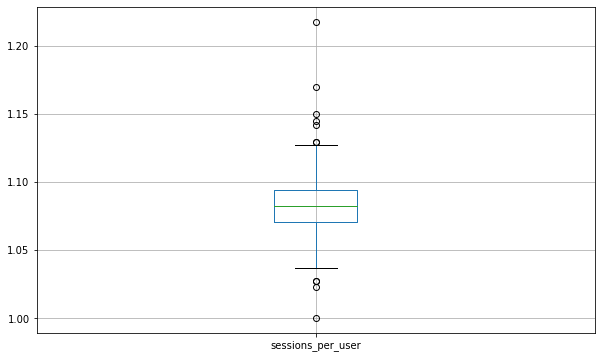

In [30]:
# Boxplot for finding session per day
fig, ax = plt.subplots(figsize=(10,6))
data_visits.groupby([data_visits['start_ts'].dt.date,'uid']).size()\
    .reset_index()\
    .rename(columns={0:'sessions_per_user'})\
    .groupby('start_ts')['sessions_per_user'].mean()\
    .plot(kind='box')
plt.grid(True)
plt.show()

**Kesimpulan:**

* Secara rata-rata dan berdasarkan diagram boxplot, ditemukan bahwa setiap pengguna hanya menggunakan 1 sesi per hari dalam menggunakan produk. Hal ini menunjukkan bahwa pengguna tidak menggunakan produk secara rutin.

**c. Berapa lama durasi untuk setiap sesi?**

Average Session Length (ASL) digunakan untuk mengukur durasi rata-rata setiap sesi pengguna.

In [31]:
data_visits['session_duration_sec'] = (data_visits['end_ts'] - data_visits['start_ts']).dt.seconds
data_visits['session_duration_sec'].mean()

643.0422873805642

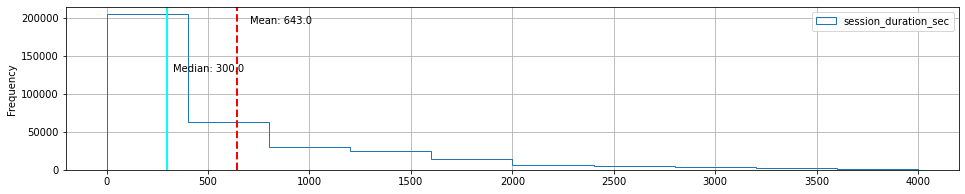

In [32]:
plt.figure(figsize=(16,3))
data_visits['session_duration_sec'].plot(kind='hist', y='session_duration_sec', histtype='step', range=(0, 4000), grid=True, legend=True)
plt.axvline(data_visits['session_duration_sec'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(data_visits['session_duration_sec'].median(), color='cyan', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(data_visits['session_duration_sec'].mean()*1.1, max_ylim*0.9, 
         'Mean: {:.1f}'.format(data_visits['session_duration_sec'].mean()))
plt.text(data_visits['session_duration_sec'].median()*1.1, max_ylim*0.6, 
         'Median: {:.1f}'.format(data_visits['session_duration_sec'].median()))
plt.show()

In [33]:
asl = data_visits['session_duration_sec'].mode()
asl

0    60
dtype: int64

**Kesimpulan:**

* Rata-rata durasi setiap sesi per pengguna adalah 643.5 detik (10 menit). Median durasi sesi per pengguna terlihat pada 300 detik (5 menit).
* Secara Average Session Length (ASL), pengguna dalam satu sesi rata-rata menggunakan produk selama 60 detik.

**d. Seberapa sering pengguna kembali menggunakan produk?**

Sticky Factors adalah metrik yang digunakan untuk mengukur tingkat loyalitas audiens, yaitu seberapa sering pengguna kembali menggunakan produk.

In [34]:
# Sticky factors
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)
sticky_mau = dau_total / mau_total * 100
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


**Kesimpulan:**

Dilihat dari metrik perminggu (WAU), tingkat kembali pengguna dalam menggunakan produk adalah sebesar 15%. Sedangkan dalam metrik perbulan (MAU), tingkat kembali pengguna adalah sebesar 3%.

#### 2.2.2. Sales Analysis

**a. Kapan orang-orang mulai melakukan pembelian?**

In [35]:
first_order_dates = data_orders.groupby('uid')['buy_ts'].min()
first_order_dates.name = 'first_order_datetime'

In [36]:
data_orders = data_orders.join(first_order_dates, on='uid')

In [37]:
data_orders['orders_month'] = data_orders['buy_ts'].astype('datetime64[M]')
data_orders['first_order_month'] = data_orders['first_order_datetime'].astype('datetime64[M]')
data_orders.head(10)

,buy_ts,revenue,uid,first_order_datetime,orders_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01


In [38]:
first_purchase = pd.DataFrame(
    data_visits.sort_values(by=['uid','start_ts'])\
        .reset_index(drop=True)\
        .groupby('uid')['start_ts'].first()
).join(
    pd.DataFrame(
        data_orders.sort_values(by=['uid','buy_ts'])\
            .reset_index(drop=True)\
            .groupby(['uid'])['buy_ts'].first()
    ),
    how='inner'
)
first_purchase['diff'] = first_purchase['buy_ts'] - first_purchase['start_ts']
first_purchase['diff'].describe()

count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: diff, dtype: object

In [39]:
f"first purchase in {first_purchase['diff'].median().seconds/60} minutes"

'first purchase in 16.0 minutes'

**Kesimpulan:**

* Rata-rata pengguna membeli produk pertama kali setelah 16 menit sejak awal kunjungan.

**b. Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?**

In [40]:
# Create cohorts
data_visits['cohort'] = pd.to_datetime(data_visits['start_ts']).dt.to_period('M')
data_visits.head()

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,session_duration_sec,cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12


In [41]:
user_dict = pd.to_datetime(data_visits.groupby('uid')['start_ts'].min()).dt.to_period('M').to_dict()

In [42]:
data_orders['cohort'] = data_orders['uid'].map(user_dict)

In [43]:
data_orders['year'] = pd.to_datetime(data_orders['buy_ts']).dt.year
data_orders['month'] = pd.to_datetime(data_orders['buy_ts']).dt.month

In [44]:
data_orders['ts'] = data_orders.apply(lambda x: x['month'] - x['cohort'].month if x['year'] == x['cohort'].year else (((x['year'] - x['cohort'].year) * 12) + x['month']) - x['cohort'].month, axis=1)

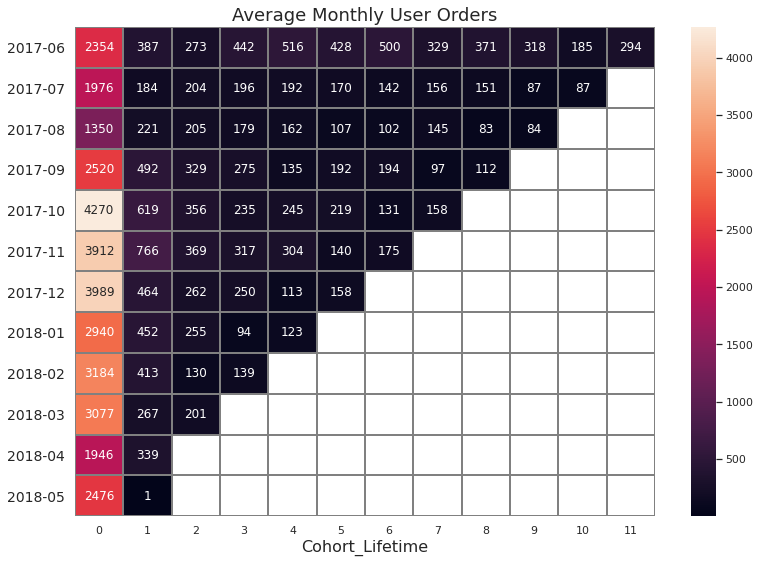

In [45]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Average Monthly User Orders', fontsize=18)
ax = sns.heatmap(data_orders.groupby(['cohort', 'ts']).size().reset_index().pivot(index='cohort', columns='ts', values=0), annot=True, fmt='.0f', linewidths=1, linecolor='gray')
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_xlabel('Cohort_Lifetime', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show()

**Kesimpulan:**

* Jumlah pelanggan aktif dalam kohort mengalami penurunan yang sangat drastis setelah bulan pertama.
* Beberapa kohort menunjukkan peningkatan jumlah pelanggan aktif, seperti contohnya kohort 2017-06.

**c. Berapa besaran rata-rata pembeliannya?**

In [46]:
avg_buy = data_orders.groupby(['cohort', 'ts']).agg({'revenue': ['sum', 'count']}).reset_index()
avg_buy['average_revenue'] = avg_buy[('revenue',   'sum')] / avg_buy[('revenue', 'count')]
avg_buy.pivot(index='cohort', columns='ts', values='average_revenue')

ts,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,4.060106,6.885220,5.365165,8.783009,7.636802,6.599252,6.979900,6.902158,6.247736,10.948553,11.913568,6.557177
2017-07,4.997414,5.756957,5.435784,5.015102,4.411406,4.694588,4.140845,4.937821,4.798146,6.793448,5.369655,NaN
2017-08,4.618378,4.512760,4.884634,5.286089,5.000247,4.980374,4.771078,8.594690,10.007711,4.472857,NaN,NaN
2017-09,4.903651,7.521301,6.415289,37.959745,9.544296,9.948177,4.983711,5.065773,3.737232,NaN,NaN,NaN
2017-10,4.300309,6.154814,3.727584,4.502340,4.259061,4.667534,4.419160,4.151266,NaN,NaN,NaN,NaN
2017-11,4.225918,3.482480,3.639160,4.320284,3.647171,5.054500,3.992000,NaN,NaN,NaN,NaN,NaN
2017-12,4.225871,3.747909,16.024046,20.495280,12.898850,11.279304,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3.604425,4.317920,4.567686,3.254043,4.288374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,3.615776,4.804988,5.101462,6.482086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


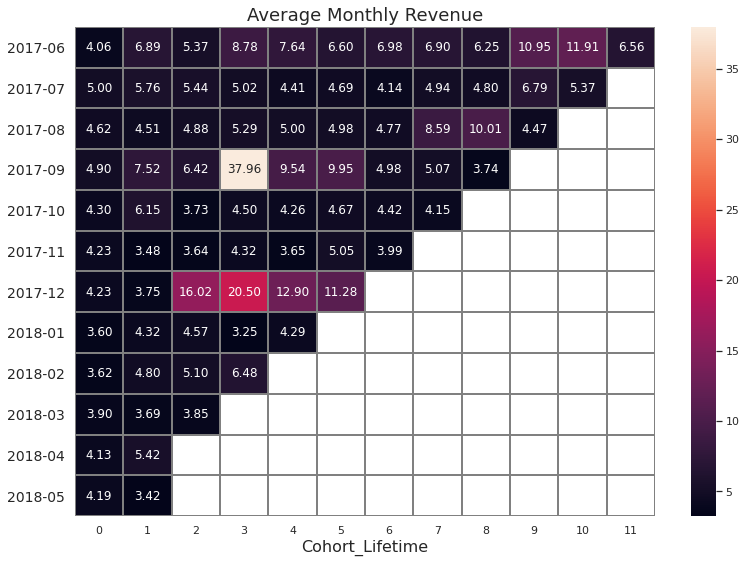

In [47]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Average Monthly Revenue', fontsize=18)
ax = sns.heatmap(avg_buy.pivot(index='cohort', columns='ts', values='average_revenue'), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_xlabel('Cohort_Lifetime', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show()

**Kesimpulan:**

* Dilihat dari tabel cohort, rata-rata pembelian pada bulan pertama sebesar 4%, dan cenderung mengalami peningkatan pada bulan-bulan selanjutnya.
* Pada bulan ke-3, kohort pada bulan 09-2017 mengalami peningkatan rata-rata pembelian hingga 37%.

**d. Berapa jumlah uang yang mereka kontribusikan?**

In [48]:
unique_user = data_orders.groupby(['cohort', 'ts']).agg({'uid': 'nunique'}).reset_index()

In [49]:
ltv = data_orders.groupby(['cohort', 'ts']).agg({'revenue': ['sum', 'count']}).reset_index()

In [50]:
ltv['ltv'] = avg_buy[('revenue', 'sum')] / unique_user['uid']

In [51]:
ltv.pivot(index='cohort', columns='ts', values='ltv')

ts,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,4.724414,11.534978,11.354186,20.649415,15.333035,13.913695,18.465344,14.650387,13.476221,22.318205,19.333421,11.543772
2017-07,5.633137,7.846519,7.442282,6.382857,5.535882,6.000602,4.819672,6.017969,6.300174,8.208750,6.228800,NaN
2017-08,5.161267,6.393077,7.256159,8.087265,7.864466,7.011842,6.403289,14.491047,15.672453,6.477931,NaN,NaN
2017-09,5.475055,10.138301,8.757801,58.645674,11.607928,13.643214,6.906000,7.121449,4.500753,NaN,NaN,NaN
2017-10,4.882297,8.003845,4.544589,5.370812,5.270051,5.775085,4.990603,5.332520,NaN,NaN,NaN,NaN
2017-11,4.924573,4.797806,5.105894,7.483770,5.516119,6.492018,5.415504,NaN,NaN,NaN,NaN,NaN
2017-12,4.828702,5.269788,22.213228,27.400107,16.753678,14.372016,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.007946,6.099063,6.655771,3.871899,5.860778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.036687,7.062135,6.698889,8.500094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


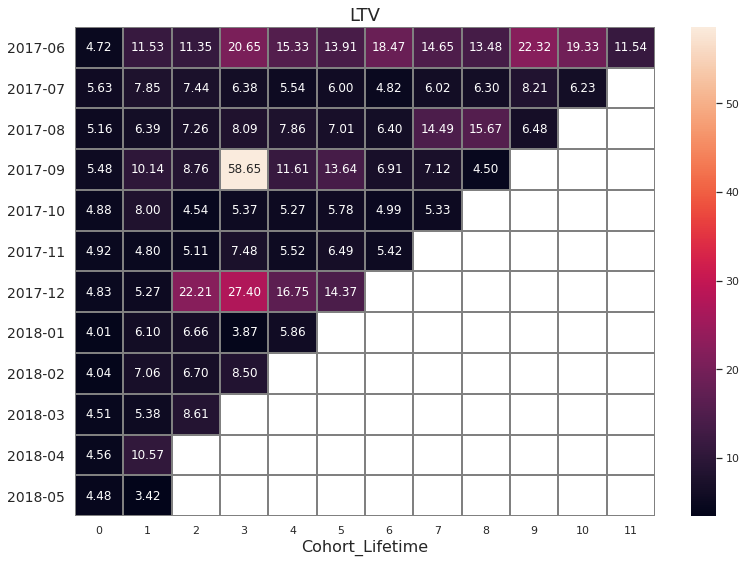

In [52]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV', fontsize=18)
ax = sns.heatmap(ltv.pivot(index='cohort', columns='ts', values='ltv'), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_xlabel('Cohort_Lifetime', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show()

**Kesimpulan:**

* Dilihat dari tabel cohort, rata-rata Lifetime Value (LTV) pada bulan pertama berkisar antara 4% hingga 5%, dan cenderung mengalami peningkatan pada bulan-bulan selanjutnya.
* Pada bulan ke-3, kohort pada bulan 09-2017 mengalami peningkatan Lifetime Value (LTV) hingga 58%

#### 2.2.3. Marketing Analysis

**a. Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu?**

In [53]:
# Total cost
total_cost = data_costs['costs'].sum()
total_cost

329131.62

In [54]:
# Total cost by source
cost_source = data_costs.groupby(['source_id'])['costs'].sum()
cost_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

<Figure size 720x432 with 0 Axes>

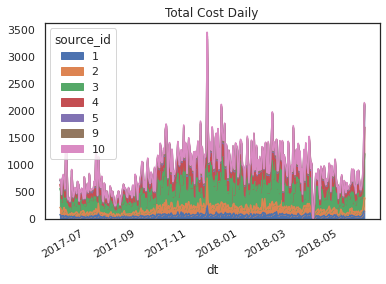

<Figure size 720x432 with 0 Axes>

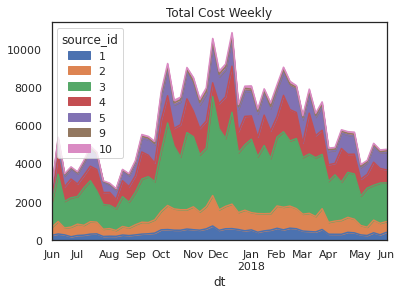

<Figure size 720x432 with 0 Axes>

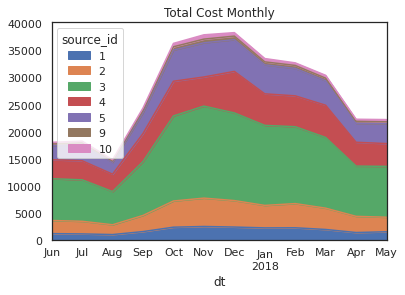

In [55]:
# Total Cost Daily
plt.figure(figsize=(10, 6))
data_costs.groupby(['dt','source_id'])['costs'].sum()\
    .reset_index()\
    .pivot(index='dt',columns='source_id',values='costs')\
    .plot(kind='area',stacked=True)
plt.title('Total Cost Daily')
plt.show()
# Total Cost Weekly
plt.figure(figsize=(10, 6))
data_costs.groupby([data_costs['dt'].dt.to_period('W'),'source_id'])['costs'].sum()\
    .reset_index()\
    .pivot(index='dt',columns='source_id',values='costs')\
    .plot(kind='area',stacked=True)
plt.title('Total Cost Weekly')
plt.show()
# Total Cost Monthly
plt.figure(figsize=(10, 6))
data_costs.groupby([data_costs['dt'].dt.to_period('M'),'source_id'])['costs'].sum()\
    .reset_index()\
    .pivot(index='dt',columns='source_id',values='costs')\
    .plot(kind='area',stacked=True)
plt.title('Total Cost Monthly')
plt.show()

**Kesimpulan:**

* Jumlah total uang yang dihabiskan adalah sebesar 329,131. Berdasarkan source_id, sumber dengan ID 3 memiliki biaya tertinggi.

**b. Berapa biaya akuisisi pelanggan dari masing-masing sumber?**

Untuk menemukan biaya akuisisi pelanggan dari masing-masing sumber, saya akan mengumpulkan data biaya pemasaran dan jumlah pelanggan yang berhasil didapatkan dari setiap sumber. Selanjutnya, saya akan melakukan perhitungan CAC (Customer Acquisition Cost) untuk masing-masing sumber.

In [56]:
cac = data_orders.merge(data_visits, on=['uid', 'cohort'])

In [57]:
cac_fix = cac.merge(data_costs, left_on=['buy_ts', 'source_id'], right_on=['dt', 'source_id'])

In [58]:
cac_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buy_ts                60 non-null     datetime64[ns]
 1   revenue               60 non-null     float64       
 2   uid                   60 non-null     uint64        
 3   first_order_datetime  60 non-null     datetime64[ns]
 4   orders_month          60 non-null     datetime64[ns]
 5   first_order_month     60 non-null     datetime64[ns]
 6   cohort                60 non-null     period[M]     
 7   year                  60 non-null     int64         
 8   month                 60 non-null     int64         
 9   ts                    60 non-null     int64         
 10  device                60 non-null     category      
 11  end_ts                60 non-null     datetime64[ns]
 12  source_id             60 non-null     int64         
 13  start_ts              

In [59]:
cac_ = cac_fix.groupby('source_id').agg({'costs': 'sum', 'uid': 'count'})

In [60]:
cac_ = cac_.rename(columns={'costs': 'total_cost', 'uid': 'count_user'})
cac_

,total_cost,count_user
source_id,,
1,821.97,10
2,1885.71,12
3,5074.85,14
4,1908.81,12
5,1282.14,9
9,27.80,2
10,21.46,1


In [61]:
cac_['cac'] = cac_['total_cost'] / cac_['count_user']
cac_

,total_cost,count_user,cac
source_id,,,
1,821.97,10,82.197000
2,1885.71,12,157.142500
3,5074.85,14,362.489286
4,1908.81,12,159.067500
5,1282.14,9,142.460000
9,27.80,2,13.900000
10,21.46,1,21.460000


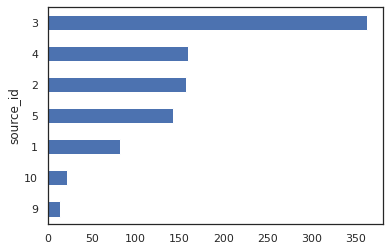

In [62]:
cac_['cac'].sort_values().plot(kind='barh')
plt.show()

**Kesimpulan:**

* Dilihat berdasarkan source_id, pengguna yang membeli produk dari source_id 3 memiliki Customer Acquisition Cost (CAC) tertinggi.

**c. Seberapa menguntungkannya investasi tersebut?**

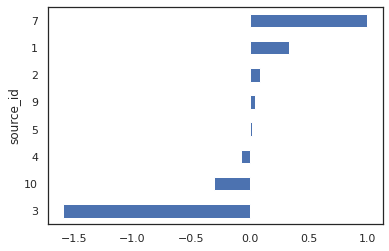

In [63]:
#ROI per marketing channel
roi = pd.DataFrame(pd.DataFrame(data_orders[['uid','revenue']].groupby('uid')['revenue'].sum())\
    .join(pd.DataFrame(data_visits.sort_values(by=['uid','start_ts']).groupby('uid')['source_id'].first()))\
    .groupby('source_id')['revenue'].sum())\
    .join(data_costs.groupby('source_id')['costs'].sum())\
    .fillna(0)
roi['roi'] = (roi['revenue'] - roi['costs'])/roi['revenue']
roi['roi'].sort_values().plot(kind='barh')
plt.show()

**Kesimpulan:**

* Dilihat berdasarkan source_id, para pengguna yang membeli produk lebih banyak berasal dari source_id 3. Hal ini menunjukkan bahwa investasi pada sumber tersebut lebih menguntungkan bagi para investor.

## Kesimpulan Umum

### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:

1. Terdapat 3 data, visit, order, dan cost.
2. Kolom nama dalam tabel data_visits telah dirapihkan agar lebih terstruktur. Selain itu, optimisasi telah dilakukan pada penggunaan memori sehingga menghasilkan penggunaan memori yang lebih efisien. Seluruh tabel data_visits tidak memiliki nilai yang hilang maupun duplikat.
3. Kolom nama dalam tabel data_orders telah dirapihkan untuk meningkatkan keteraturan. Selain itu, terdapat nilai anomali dalam data, namun dampaknya terhadap keseluruhan data tidak signifikan. Secara keseluruhan, tabel data_orders tidak memiliki nilai yang hilang maupun duplikat.
4. Tabel data_costs sudah rapih dan tidak ada perubahan yang dilakukan pada data tersebut.

### B. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

1. Dalam analisis produk, rata-rata jumlah orang yang menggunakan produk setiap hari adalah 907, setiap minggu adalah 5716, dan setiap bulan adalah 23228.
2. Dalam analisis produk, rata-rata pengguna hanya menggunakan 1 sesi per hari.
3. Dalam analisis produk, durasi rata-rata setiap sesi per pengguna adalah 10 menit, dengan median pengguna sebesar 5 menit. Secara Average Session Length (ASL), rata-rata pengguna menggunakan produk selama 60 detik.
4. Dalam analisis produk, persentase pengguna yang kembali menggunakan produk setiap minggu adalah 15%, sementara persentase pengguna yang kembali setiap bulan adalah 3%.
5. Dalam analisis penjualan, pengguna mulai melakukan pembelian setelah 16 menit pertama kali mengunjungi produk.
6. Dalam analisis penjualan, jumlah pesanan yang dibuat selama periode tertentu dipetakan dalam bentuk kohort. Dari gambar, terlihat bahwa jumlah pelanggan aktif mengalami penurunan yang drastis setelah bulan pertama. Namun, terdapat beberapa kohort yang mengalami peningkatan jumlah pelanggan aktif pada bulan-bulan berikutnya.
7. Dalam analisis penjualan, rata-rata pembelian pada bulan pertama sebesar 4% dari total pengguna. Namun, pada bulan-bulan berikutnya terjadi peningkatan pendapatan. Sebagai contoh, pada kohort 09-2017, terjadi peningkatan pendapatan sebesar 37% pada bulan ke-3.
8. Dalam analisis penjualan, rata-rata Lifetime Value (LTV) pengguna pada bulan pertama berkisar antara 4% hingga 5%, dan mengalami peningkatan pada bulan-bulan selanjutnya. Bahkan, pada kohort 09-2017, terjadi peningkatan LTV hingga 58% pada bulan ketiga.
9. Dalam analisis pemasaran, total biaya yang dihabiskan adalah sebesar 329,131. Biaya tersebut bervariasi berdasarkan sumbernya, namun biaya pemasaran dari sumber 3 merupakan yang tertinggi.
10. Dalam analisis pemasaran, banyak biaya akuisisi pelanggan berasal dari source_id 3 dengan CAC (Customer Acquisition Cost) sebesar 362.4.
11. Dalam analisis pemasaran, pengguna yang menggunakan produk berasal banyak dari source_id 3. Oleh karena itu, berinvestasi lebih lanjut pada sumber tersebut dapat menjadi lebih menguntungkan.